Done rendering scene 0


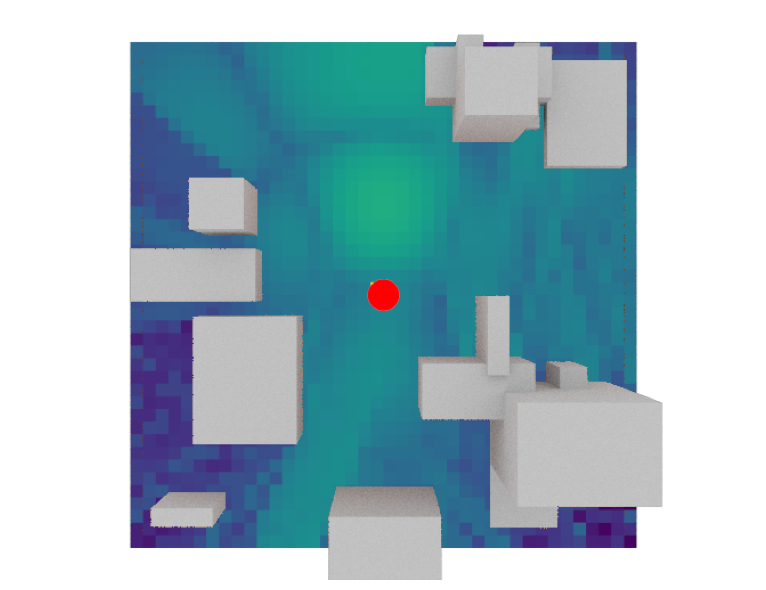

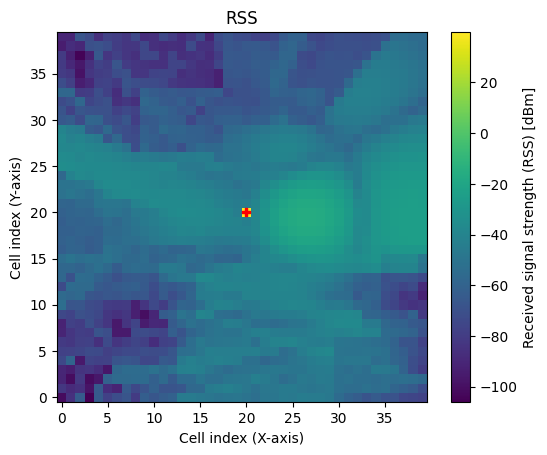

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sionna.rt
import sys

from sionna.rt import load_scene, PlanarArray, Transmitter, Receiver, Camera, RadioMapSolver
from pathlib import Path

for i in range(len(list(Path("automated_scenes/").iterdir()))):
    scene = load_scene(f"automated_scenes/scene{i}/scene{i}.xml")
    scene.preview()

    scene.tx_array = PlanarArray(
        num_rows=4,
        num_cols=4,
        vertical_spacing=0.5,
        horizontal_spacing=0.5,
        pattern="tr38901",
        polarization="V",
    )

    # place transmitter at origin
    tx = Transmitter("tx", [0, 0, 1.5], [0.0, 0.0, 0.0])
    scene.add(tx)
    # change camera location to 2 meters
    my_cam = Camera(position=[0, 0, 30], look_at=tx.position)

    # Instantiate the radio map solver
    rm_solver = RadioMapSolver()
    # Compute radio map using the mesh example
    rm = rm_solver(
        scene,
        max_depth=32,  # Maximum number of ray scene interactions
        samples_per_tx=10**7,  # If you increase: less noise, but more memory required
        cell_size=(0.4, 0.4),  # Resolution of the radio map
        center=[0, 0, 1.5],  # Center of the radio map
        size=[16, 16],  # Total size of the radio map
        orientation=[0, 0, 0],
    )  # Orientation of the radio map, e.g., could be also vertical
    
    scene.render(camera=my_cam, radio_map=rm)
    rm.show(metric="rss")

    print(f"Done rendering scene {i}")